# Exploratory Data Analysis

In [1]:
# import necessary libraries
import pandas as pd

### Import Data

In [2]:
clean_democrat = pd.read_csv('clean_democrat.csv')
clean_republican = pd.read_csv('clean_republican.csv')
clean_republican.sample(5)

,Tweets
643,"['shocking', 'actually', 'ppl', 'believe', 'tr..."
4112,"['still', 'republican', 'shame']"
2024,"['excuse', 'trump', 'pretends', 'christian', '..."
3132,"['mean', 'republican', 'putting', 'country', '..."
3129,"['found', 'funny', 'trump', 'people', 'pushing..."


### Preprocessing Text

In [3]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(',', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [4]:
clean_democrat = pd.DataFrame(clean_democrat['Tweets'].apply(round1)) # accessing function using apply method
clean_republican = pd.DataFrame(clean_republican['Tweets'].apply(round1))

In [38]:
clean_republican.sample(5)

,Tweets,word_count
2272,cultish s surveillance,3
3265,absolutely right sir going every running office,7
2683,guest silent lately,3
4873,governor law permanently remove voting peaceful,6
614,yeah rehash reminder badly supposed lose,6


### Removing keywords

In [6]:
def clean_text_round2(text):
    '''Removing Keyword(trump,biden,kamala,democrat,republican...)'''
    text = text.lower()
    text=re.sub(r"trump"," ",text)
    text=re.sub(r"biden"," ",text)
    text=re.sub(r"kamala"," ",text)
    text=re.sub(r"mikepence"," ",text)
    text=re.sub(r"democrat"," ",text)
    text=re.sub(r"republican"," ",text)
    text=re.sub(r"joe"," ",text)
    return text

round2 = lambda x: clean_text_round2(x)

In [7]:
clean_democrat = pd.DataFrame(clean_democrat['Tweets'].apply(round2)) # accessing function using apply method
clean_republican = pd.DataFrame(clean_republican['Tweets'].apply(round2))

In [8]:
clean_republican.sample(5)

,Tweets
1184,pay dear leaders fucking bill please co ...
2358,always reminded mussolini
1002,matter already get stop acting like t...
4562,indeed cowardice amp co wudgtfj
3981,ever consider officers exist may sk...


In [9]:
clean_democrat.describe() # 5419 uniqu words

,Tweets
count,5449
unique,5419
top,
freq,16


In [10]:
clean_republican.describe() # 5402 uniqu words

,Tweets
count,5446
unique,5402
top,
freq,16


In [11]:
clean_republican.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  5446 non-null   object
dtypes: object(1)
memory usage: 42.7+ KB


### Adding new column for word count

In [12]:
clean_republican['word_count'] = clean_republican['Tweets'].apply(lambda x: len(x.split()))
clean_democrat['word_count'] = clean_democrat['Tweets'].apply(lambda x: len(x.split()))

In [13]:
clean_democrat.sample(5)

,Tweets,word_count
3850,b c e governors mayorsw r co yy qa,9
5249,oh ic pa communist voted years baby ...,11
576,imsee lover dont talk commies talk up...,9
3547,bil received month ago registered voti...,8
4683,co ppggafyzg,2


### Exploring dataset to find outliers

In [14]:
clean_democrat[clean_democrat['word_count']<3]

,Tweets,word_count
2,,0
23,good,1
36,co zyanmyilgoh,2
55,thats case,2
68,least read,2
...,...,...
5400,youre,1
5420,ran cities,2
5423,bc propaganda,2
5424,defund politicians,2


Seems like alot of rows have no word at all or only single word. We should remove those outliers.

In [15]:
clean_republican[clean_republican['word_count']<3]

,Tweets,word_count
44,ask maybe,2
80,co stfoqb,2
91,omg true,2
107,s america,2
115,need look,2
...,...,...
5191,senate,1
5194,preview convention,2
5232,co dtikwp,2
5248,s,1


Seems Like, I have to do a lot more for data cleaning :( 

### Removing meaningless english words

In [16]:
import nltk
words = set(nltk.corpus.words.words())

def clean_sent(sent):     # Function for cleaning meaningless words
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())

In [17]:
clean_republican['Tweets'] = clean_republican['Tweets'].apply(clean_sent) # removing meaningless words
clean_democrat['Tweets'] = clean_democrat['Tweets'].apply(clean_sent)

In [18]:
# Updating word count
clean_republican['word_count'] = clean_republican['Tweets'].apply(lambda x: len(x.split()))
clean_democrat['word_count'] = clean_democrat['Tweets'].apply(lambda x: len(x.split()))

In [19]:
clean_republican.sample(5)

,Tweets,word_count
1260,mention lying,2
3963,depending mail house extensive bill may real sue,8
5317,want say record pa include,5
335,like everything else,3
2042,,0


In [20]:
clean_democrat[clean_democrat['word_count']<1] #We Have to remove this types of outliers now

,Tweets,word_count
2,,0
36,,0
108,,0
112,,0
244,,0
...,...,...
5346,,0
5350,,0
5394,,0
5400,,0


### Removing outliers

In [21]:
# Removing Outliers
clean_democrat = clean_democrat[clean_democrat['word_count']>1]
clean_republican = clean_republican[clean_republican['word_count']>1]

In [22]:
clean_democrat[clean_democrat['word_count']<1] # No more outliers!

,Tweets,word_count


In [23]:
clean_democrat.shape

(5108, 2)

In [24]:
clean_republican.shape

(5053, 2)

## Our dataset is now clean! Let's try find out some insights

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

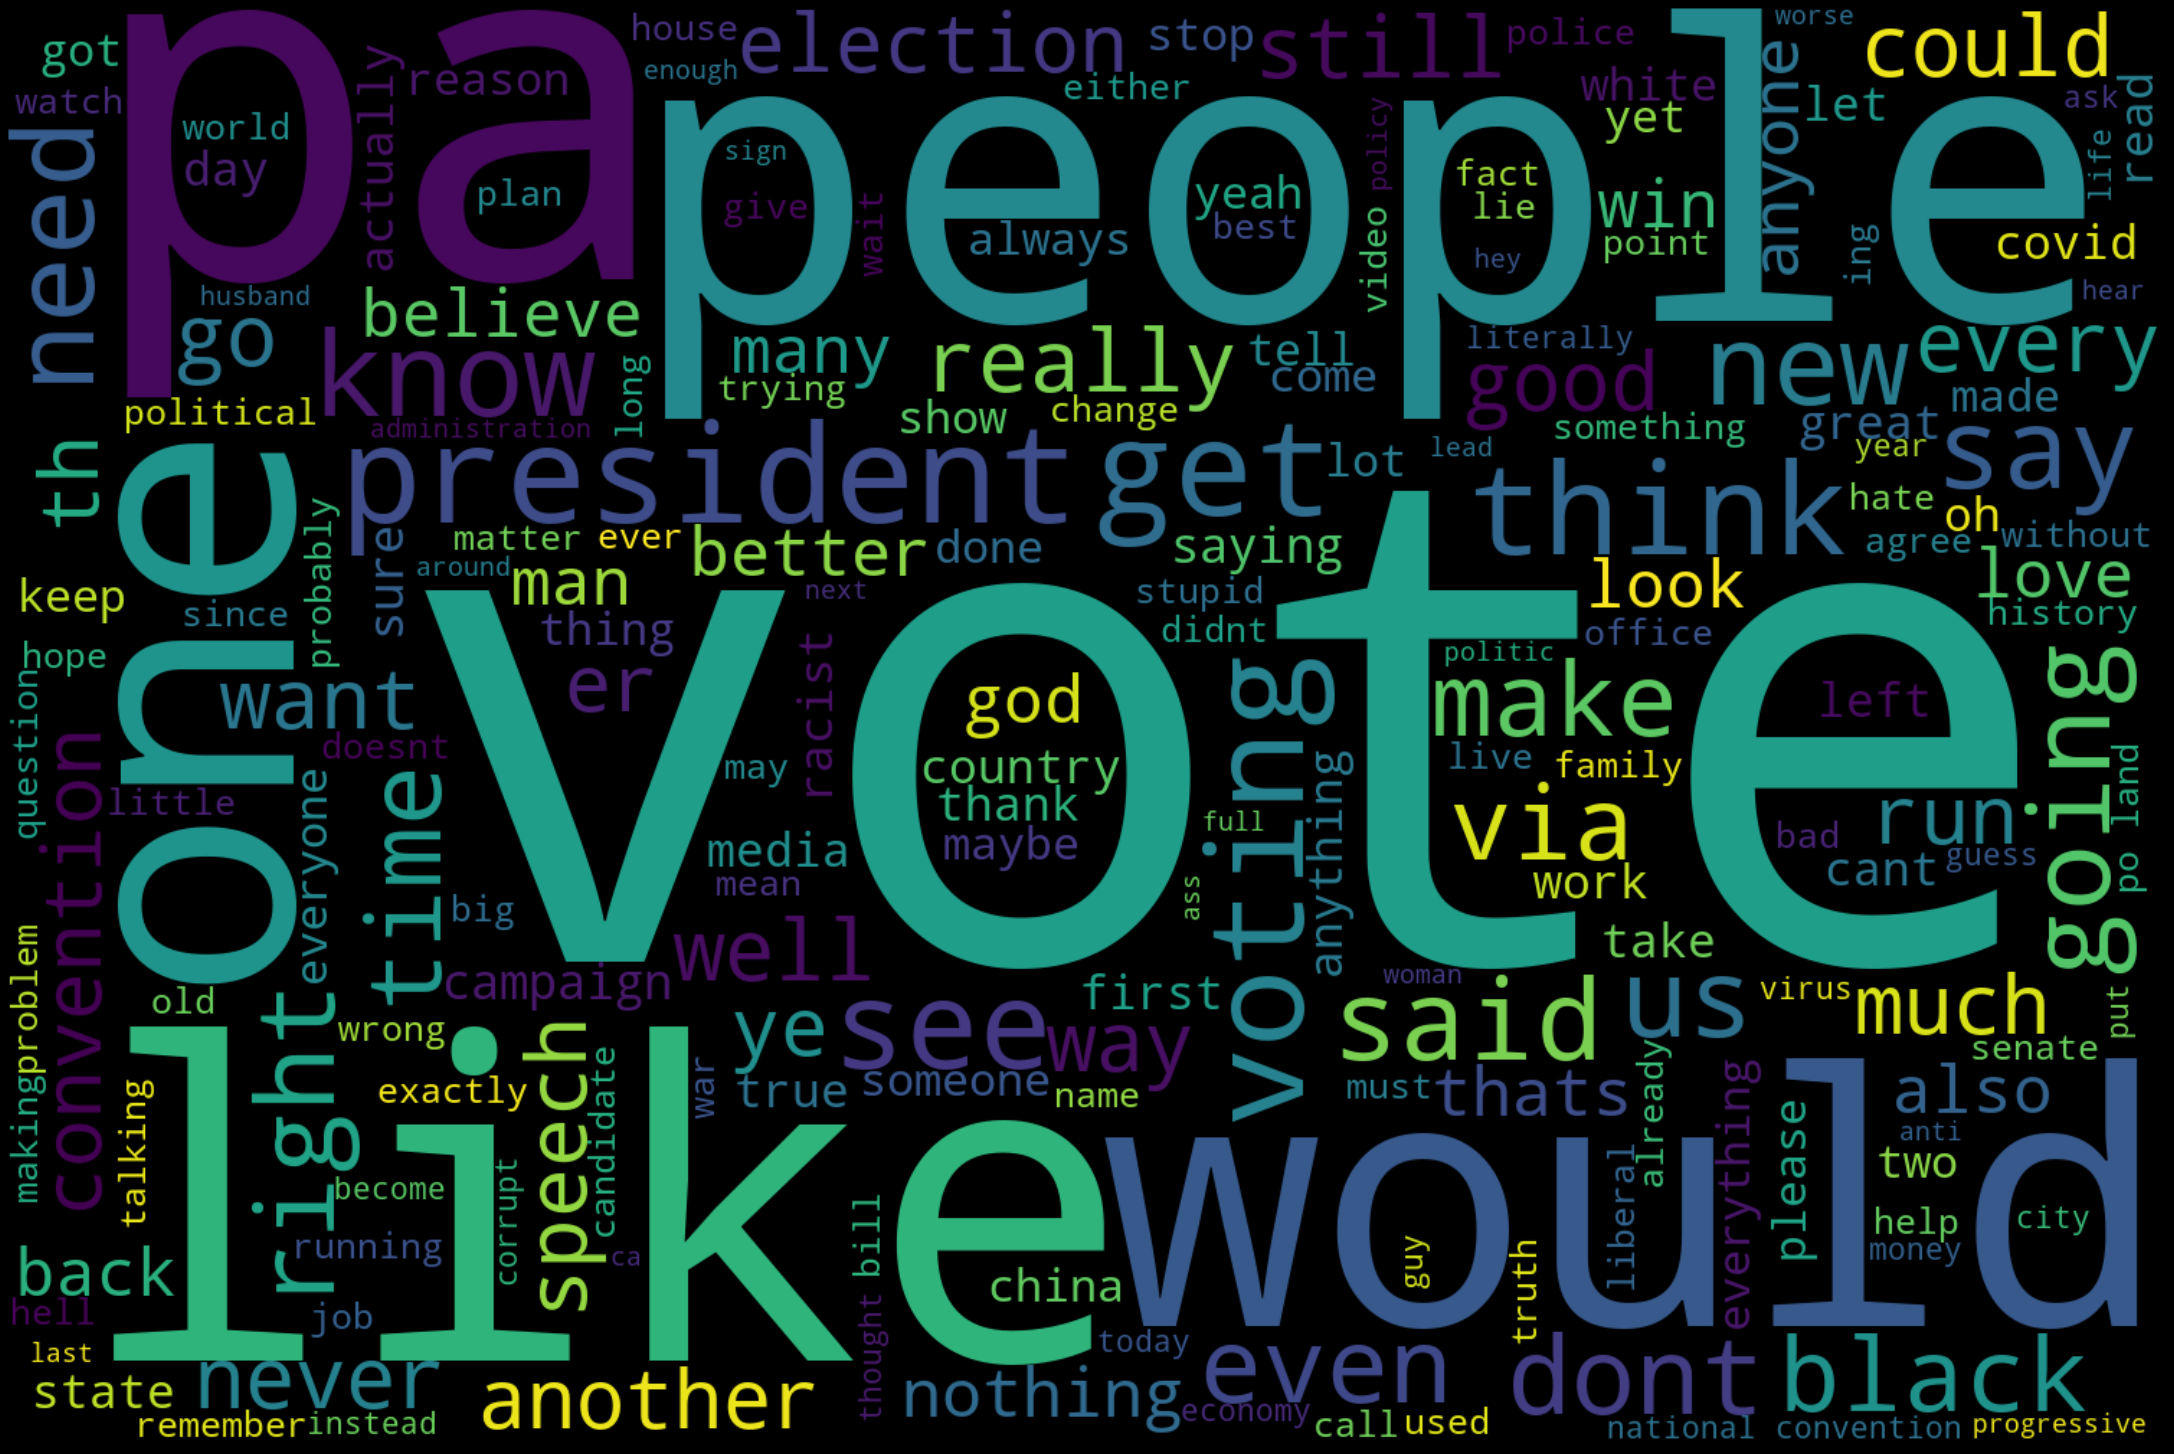

In [26]:
#Word Cloud
text = ''
for tweet in clean_democrat['Tweets'].values:
    text += f" {tweet}"
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

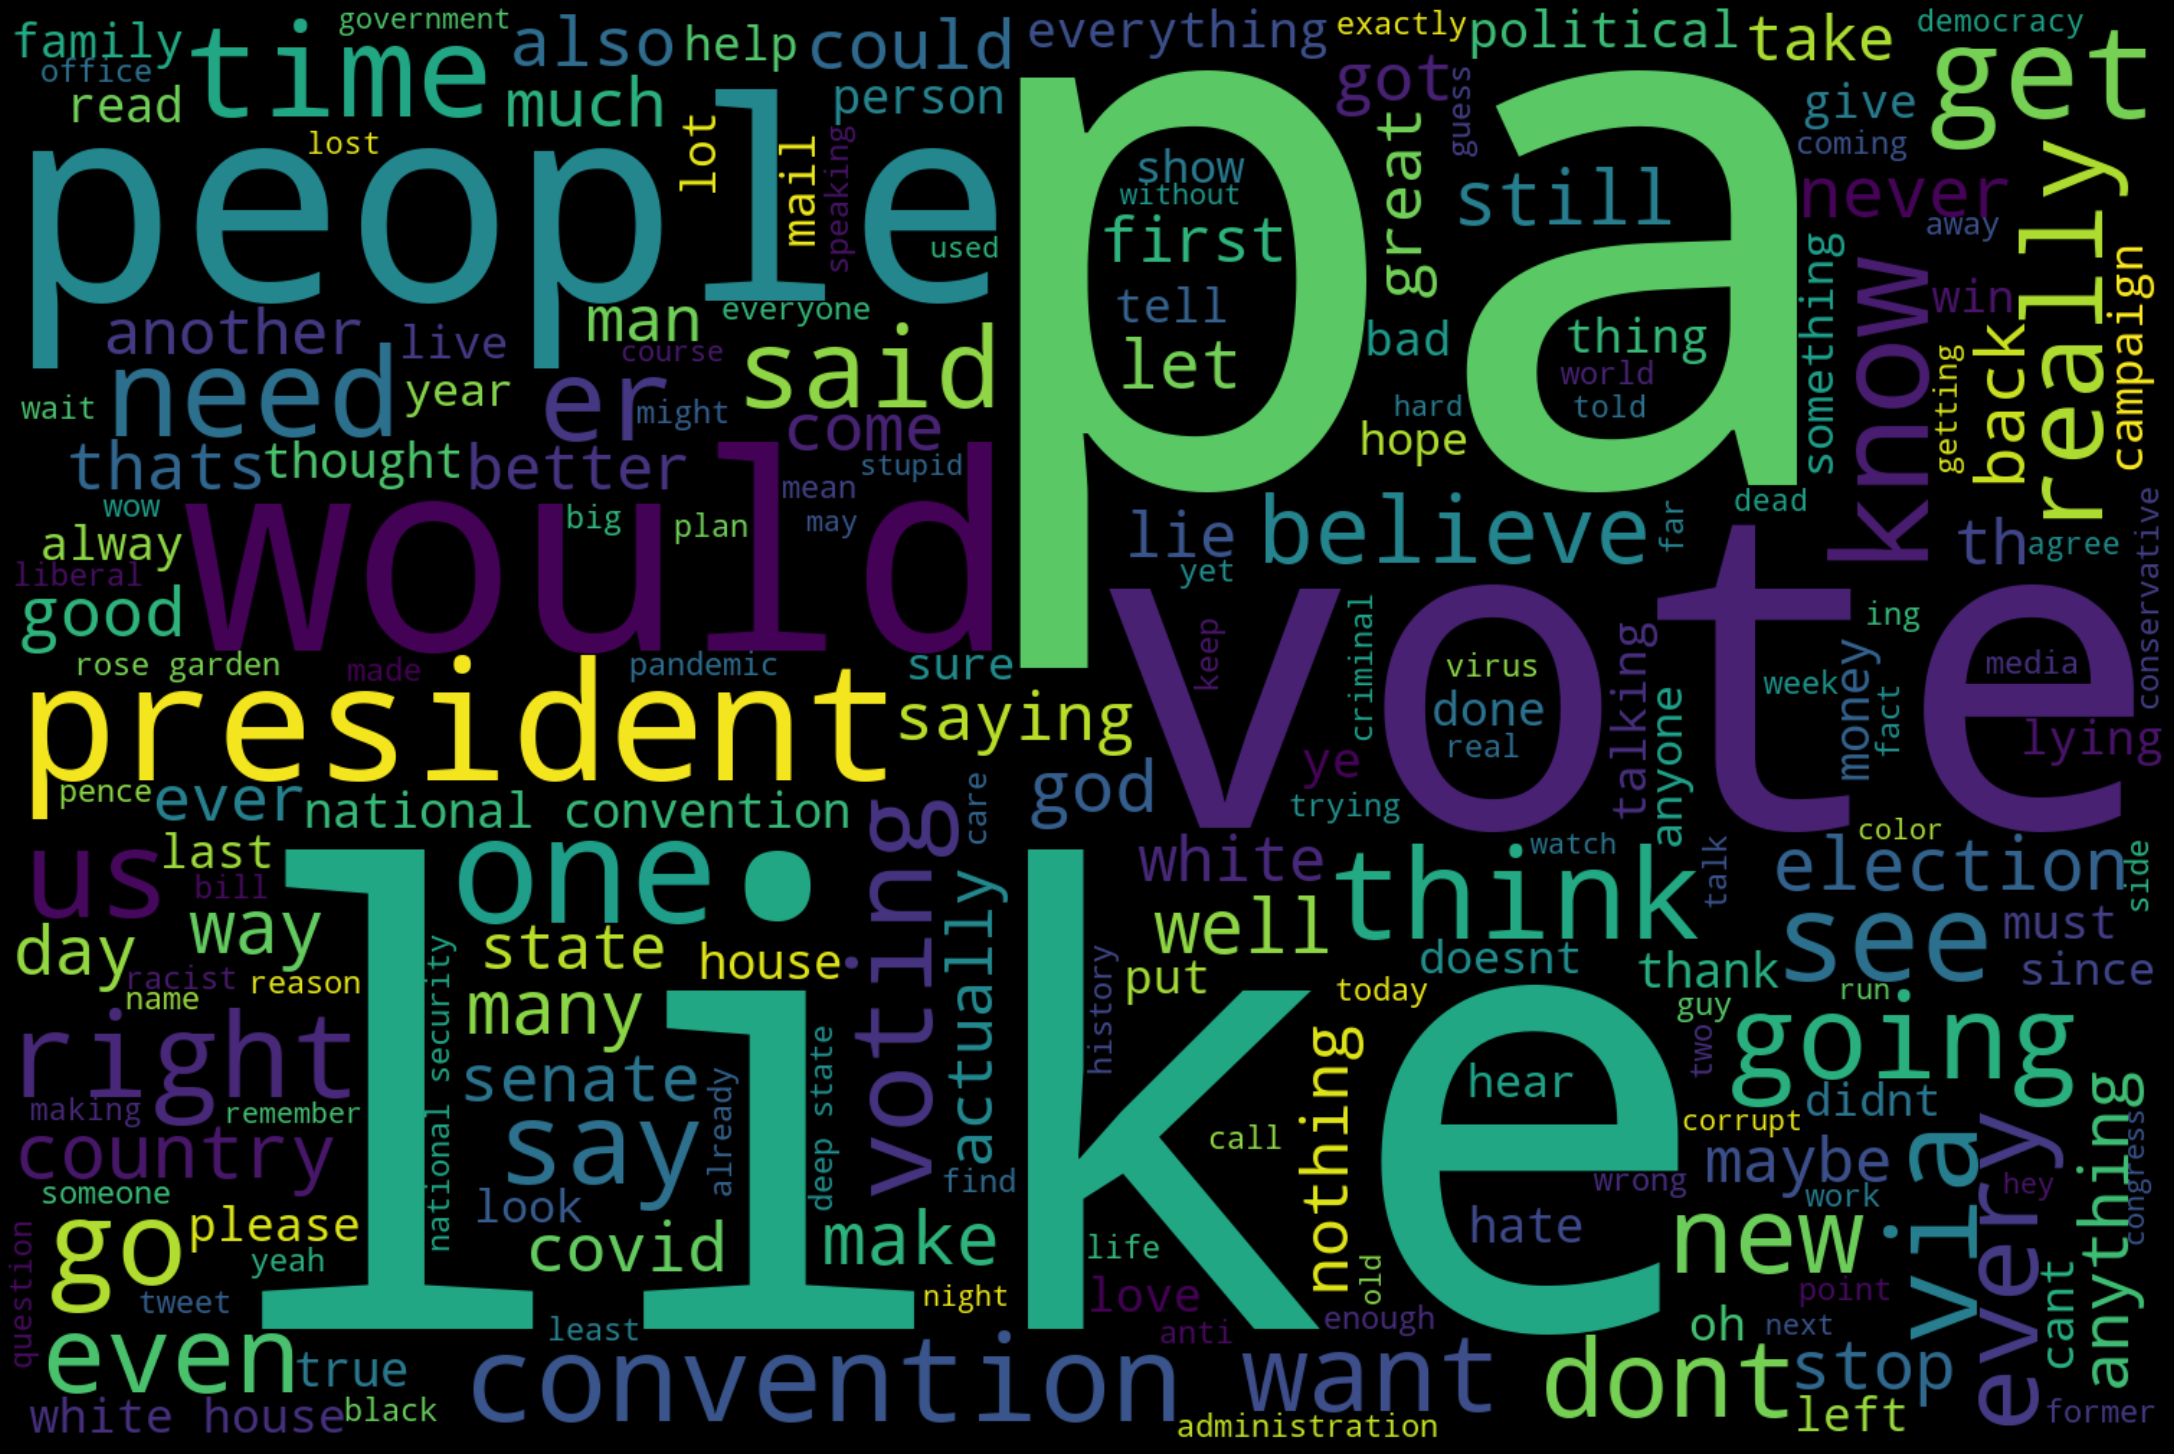

In [27]:
#Word Cloud
text = ''
for tweet in clean_republican['Tweets'].values:
    text += f" {tweet}"
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [30]:
import collections

lst1 = clean_democrat['Tweets'].str.split("[^\w+]").explode().tolist()
# Create counter
top_words_dm = collections.Counter(lst1)

top_words_dm.most_common(15)

[('s', 394),
 ('vote', 386),
 ('pa', 324),
 ('people', 265),
 ('like', 250),
 ('would', 210),
 ('know', 186),
 ('one', 178),
 ('president', 174),
 ('get', 172),
 ('voting', 152),
 ('think', 140),
 ('black', 139),
 ('see', 131),
 ('dont', 120)]

In [31]:
lst2 = clean_republican['Tweets'].str.split("[^\w+]").explode().tolist()
# Create counter
top_words_rp = collections.Counter(lst2)

top_words_rp.most_common(15)

[('pa', 403),
 ('s', 391),
 ('like', 279),
 ('vote', 248),
 ('president', 243),
 ('people', 230),
 ('would', 222),
 ('convention', 186),
 ('one', 183),
 ('know', 152),
 ('get', 141),
 ('via', 130),
 ('think', 123),
 ('right', 119),
 ('house', 119)]

In [37]:
clean_republican[clean_['word_count']==2]

,Tweets,word_count
9,wow go,2
44,ask maybe,2
46,walking failure,2
50,trashy people,2
63,afraid convince,2
...,...,...
5334,convention schedule,2
5341,tell administration,2
5365,making lean,2
5436,recent economic,2


### Findings
- Black people and movement have impact on Democrat
- Republican dataset shows, people are talking about recent democrat convention when they mention republican party

### Saving updated datset

In [39]:
clean_democrat.drop('word_count', axis=1, inplace=True)
clean_republican.drop('word_count', axis=1, inplace=True)

clean_democrat.to_csv('polished_democrat.csv',encoding='utf-8', index=False)
clean_republican.to_csv('polished_republican.csv',encoding='utf-8', index=False)

**Removing garbage**

In [40]:
#invoke garbage collector to free ram
import gc
gc.collect()

1688